In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import plotly.offline as ply
import plotly.graph_objects as go
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

Using TensorFlow backend.


# Data

In [2]:
data = pd.read_csv('Employee_dataset.csv', encoding='ISO-8859-1', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(14999, 10)
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Departments', 'salary']


In [3]:
data.head().transpose()

,0,1,2,3,4
satisfaction_level,0.38,0.8,0.11,0.72,0.37
last_evaluation,0.53,0.86,0.88,0.87,0.52
number_project,2,5,7,5,2
average_montly_hours,157,262,272,223,159
time_spend_company,3,6,4,5,3
Work_accident,0,0,0,0,0
left,1,1,1,1,1
promotion_last_5years,0,0,0,0,0
Departments,sales,sales,sales,sales,sales
salary,low,medium,medium,low,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


# Data exploration

In [5]:
left = data.groupby('left')
left.mean().transpose()

left,0,1
satisfaction_level,0.666810,0.440098
last_evaluation,0.715473,0.718113
number_project,3.786664,3.855503
average_montly_hours,199.060203,207.419210
time_spend_company,3.380032,3.876505
Work_accident,0.175009,0.047326
promotion_last_5years,0.026251,0.005321


In [6]:
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

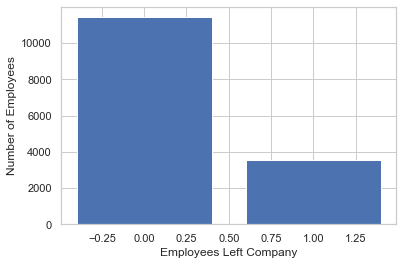

In [7]:
left_count=data.groupby('left').count()
plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()

In [8]:
count_no_left = len(data[data['left']==0])
count_left = len(data[data['left']==1])
pct_of_no_left = count_no_left/(count_no_left+count_left)
print("percentage of no left is", pct_of_no_left*100)
pct_of_left = count_left/(count_no_left+count_left)
print("percentage of left", pct_of_left*100)

percentage of no left is 76.19174611640777
percentage of left 23.80825388359224


# Visualizations

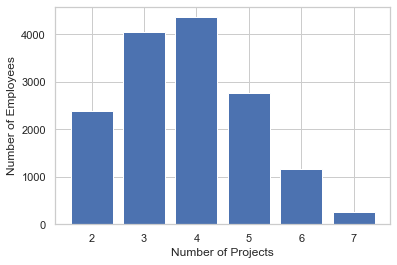

In [9]:
num_projects=data.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

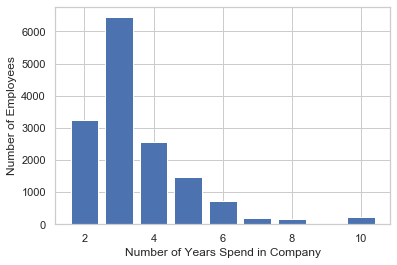

In [10]:
time_spent=data.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

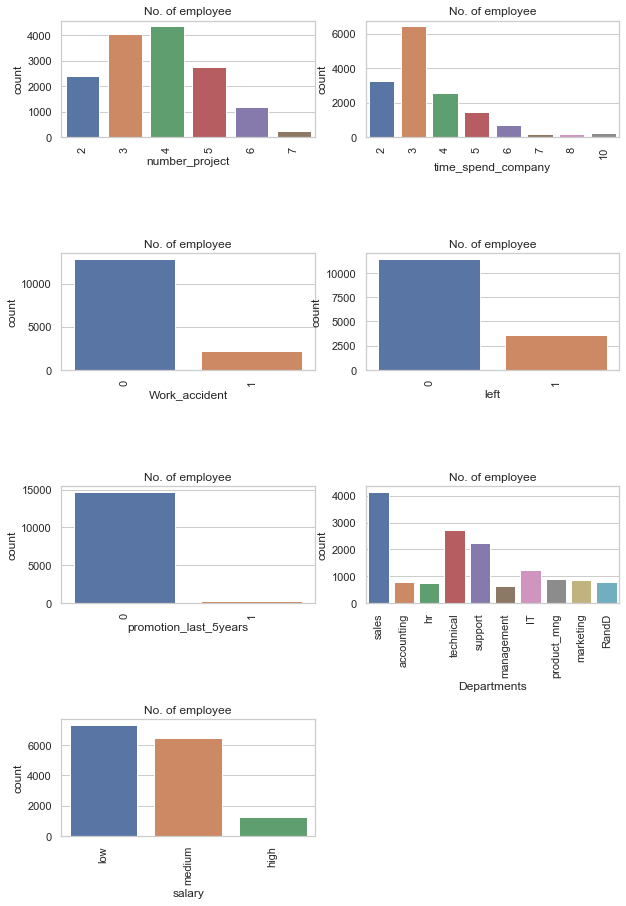

In [11]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

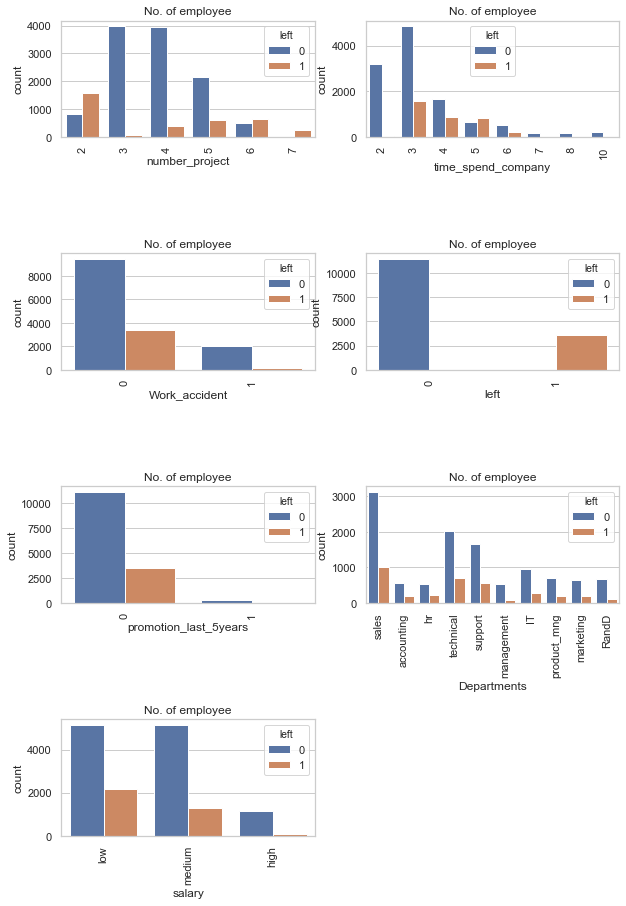

In [12]:
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

# Cluster Analysis

In [13]:
# Filter data
left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

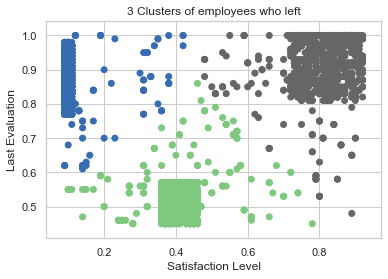

In [14]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

# Create Dummy Variables

In [15]:
cat_vars=['salary', 'Departments']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['salary', 'Departments']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [16]:
data_final=data[to_keep]
data_final.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'salary_high', 'salary_low',
       'salary_medium', 'Departments_IT', 'Departments_RandD',
       'Departments_accounting', 'Departments_hr',
       'Departments_management', 'Departments_marketing',
       'Departments_product_mng', 'Departments_sales',
       'Departments_support', 'Departments_technical'], dtype=object)

# Over-sampling using SMOTE

In [17]:
X = data_final.loc[:, data_final.columns != 'left']
y = data_final.loc[:, data_final.columns == 'left']
y=y.astype('int') 
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns1= X_train.columns
os_data_X, os_data_y = os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns1)
os_data_y= pd.DataFrame(data=os_data_y,columns=['left'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no left in oversampled data",len(os_data_y[os_data_y['left']==0]))
print("Number of left",len(os_data_y[os_data_y['left']==1]))
print("Proportion of no left data in oversampled data is ",len(os_data_y[os_data_y['left']==0])/len(os_data_X))
print("Proportion of leftl data in oversampled data is ",len(os_data_y[os_data_y['left']==1])/len(os_data_X))

length of oversampled data is  15932
Number of no left in oversampled data 7966
Number of left 7966
Proportion of no left data in oversampled data is  0.5
Proportion of leftl data in oversampled data is  0.5


# Recursive Feature Elimination

In [18]:
data_final_vars=data_final.columns.values.tolist()
y=['left']
X=[i for i in data_final_vars if i not in y]
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [19]:
data_X2 = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rfe.ranking_},)
data_X2.sort_values(by=['Importance'])

,Feature,Importance
0,satisfaction_level,1
17,Departments_sales,1
16,Departments_product_mng,1
15,Departments_marketing,1
14,Departments_management,1
13,Departments_hr,1
12,Departments_accounting,1
11,Departments_RandD,1
10,Departments_IT,1
9,salary_medium,1


In [20]:
cols=[]
for i in range (0, len(data_X2["Importance"])):
    if data_X2["Importance"][i] == 1:
        cols.append(data_X2["Feature"][i])
print(cols)
print(len(cols))

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium', 'Departments_IT', 'Departments_RandD', 'Departments_accounting', 'Departments_hr', 'Departments_management', 'Departments_marketing', 'Departments_product_mng', 'Departments_sales', 'Departments_support', 'Departments_technical']
20


In [21]:
X=os_data_X[cols]
y=os_data_y['left']

# Implementing the model

In [22]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.470447
         Iterations 7
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.321     
Dependent Variable:    left               AIC:                15030.3199
Date:                  2020-04-05 21:47   BIC:                15183.8416
No. Observations:      15932              Log-Likelihood:     -7495.2   
Df Model:              19                 LL-Null:            -11043.   
Df Residuals:          15912              LLR p-value:        0.0000    
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        7.0000                                           
------------------------------------------------------------------------
                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
satisfaction_level      -4.2760   0.0977 -43.7879 0

In [23]:
pvalue = pd.DataFrame(result.pvalues,columns={'p_value'},)
pvalue

,p_value
satisfaction_level,0.000000e+00
last_evaluation,1.191866e-41
number_project,6.168286e-119
average_montly_hours,1.040074e-61
time_spend_company,5.716760e-209
Work_accident,4.791414e-117
promotion_last_5years,2.910716e-15
salary_high,2.683314e-16
salary_low,4.479455e-37
salary_medium,2.378154e-10


In [24]:
pvs=[]
for i in range (0, len(pvalue["p_value"])):
    if pvalue["p_value"][i] < 0.05:
        pvs.append(pvalue.index[i])
print(pvs)
print(len(pvs))    

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium', 'Departments_IT', 'Departments_RandD', 'Departments_accounting', 'Departments_hr', 'Departments_management', 'Departments_marketing', 'Departments_product_mng', 'Departments_sales', 'Departments_support', 'Departments_technical']
20


In [25]:
X=os_data_X[pvs]
y=os_data_y['left']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.470447
         Iterations 7
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.321     
Dependent Variable:    left               AIC:                15030.3199
Date:                  2020-04-05 21:47   BIC:                15183.8416
No. Observations:      15932              Log-Likelihood:     -7495.2   
Df Model:              19                 LL-Null:            -11043.   
Df Residuals:          15912              LLR p-value:        0.0000    
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        7.0000                                           
------------------------------------------------------------------------
                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
satisfaction_level      -4.2760   0.0977 -43.7879 0

# Logistic Regression Model Fitting

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting the test set results and calculating the accuracy

In [27]:
y_pred = logreg.predict(X_test)
print("Accuracy of logistic regression classifier on test set:", "{:.2%}".format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 82.34%


### Confusion Matrix

In [28]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1904  502]
 [ 342 2032]]


In [29]:
print("The result is telling us that we have: ",(confusion_matrix[0,0]+confusion_matrix[1,1]),"correct predictions.")
print("The result is telling us that we have: ",(confusion_matrix[0,1]+confusion_matrix[1,0]),"incorrect predictions.")
print("We have a total predictions of: ",(confusion_matrix.sum()))

The result is telling us that we have:  3936 correct predictions.
The result is telling us that we have:  844 incorrect predictions.
We have a total predictions of:  4780


### Compute precision, recall, F-measure and support

__The precision is the ratio tp / (tp + fp)__ where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

__The recall is the ratio tp / (tp + fn)__ where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

__The F-beta score__ can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      2406
           1       0.80      0.86      0.83      2374

    accuracy                           0.82      4780
   macro avg       0.82      0.82      0.82      4780
weighted avg       0.82      0.82      0.82      4780



In [31]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:","{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("\nWell, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
# Model Precision
print("\nPrecision:","{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("\nPrecision: Precision is about being precise, i.e., how precise your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Logistic Regression model predicted a employee is going to leave, that employee actually left", "{:.2%}".format(metrics.precision_score(y_test, y_pred)) ,"of the time.")
# Model Recall
print("\nRecall:","{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("\nRecall: If there is an employee who left present in the test set and our Logistic Regression model can identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

Accuracy: 82.34%

Well, you got a classification rate of 82.34%

Precision: 80.19%

Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Logistic Regression model predicted a employee is going to leave, that employee actually left 80.19% of the time.

Recall: 85.59%

Recall: If there is an employee who left present in the test set and our Logistic Regression model can identify it 85.59% of the time.


### ROC Curve

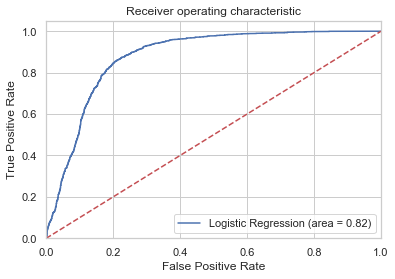

In [32]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [33]:
print("The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)")

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)
